In [8]:
import anndata
import scvelo as scv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import glob, os
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.3 scipy==1.9.1 pandas==1.5.0 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.10.1 pynndescent==0.5.4


In [4]:
adata = sc.read_h5ad("/storage/holab/linxy/iPSC/day7_velocyto/iPSC_seurate.h5ad")
adata

AnnData object with n_obs × n_vars = 9246 × 61544
    obs: 'batch', 'seurat_clusters'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [5]:
unsplicedDF = adata.to_df(layer="unspliced")
unsplicedDF['UMAP1'] = adata.obsm['X_umap'][:,0]
unsplicedDF['UMAP2'] = adata.obsm['X_umap'][:,1]
unsplicedDF

Gene,WASH7P,MIR6859-1,FAM138A,ENSG00000238009,ENSG00000239945,ENSG00000268903,ENSG00000269981,ENSG00000239906,ENSG00000241860,RNU6-1100P,...,TPTE2P4,CYCSP49,CTBP2P1,DPH3P2-1,VAMP7-1,IL9R-1,ENSG00000270726-1,WASH6P-1,UMAP1,UMAP2
AAACCCAAGCCGATCC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.583705,4.138719
AAACCCAAGTACAGCG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.893917,0.238900
AAACCCAGTGCTGATT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-5.493908,5.533510
AAACCCAGTTTGGCTA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-3.960567,-2.860425
AAACCCATCACTTGGA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-5.780055,3.182311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCATCTCAAG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-2.237426,-3.584174
TTTGTTGGTAGACGTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-2.701103,3.429363
TTTGTTGGTGAGCGAT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8.315432,-5.597075
TTTGTTGGTTCTCTAT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.710948,-0.974599


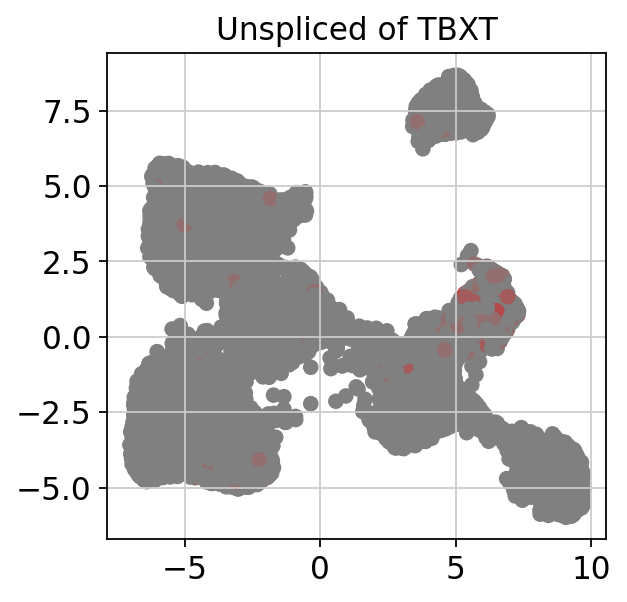

In [10]:
colorlist=["gray", "red"]
newcmp = LinearSegmentedColormap.from_list('testCmap', colors=colorlist, N=256)
plt.scatter(unsplicedDF['UMAP1'], unsplicedDF['UMAP2'], c = unsplicedDF['TBXT'], cmap=newcmp)
plt.title("Unspliced of TBXT")
plt.show()

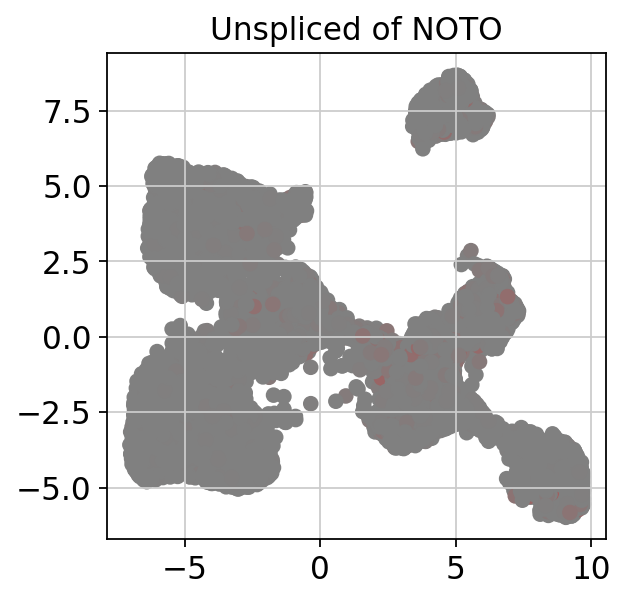

In [11]:
colorlist=["gray", "red"]
newcmp = LinearSegmentedColormap.from_list('testCmap', colors=colorlist, N=256)
plt.scatter(unsplicedDF['UMAP1'], unsplicedDF['UMAP2'], c = unsplicedDF['NOTO'], cmap=newcmp)
plt.title("Unspliced of NOTO")
plt.show()